<a href="https://colab.research.google.com/github/nolfflogan/Logan-Nolff-Project-Portfolio/blob/Master/PROJ_6_ALLLIFE_CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CREDITCARD.csv')

In [ ]:
data.shape

(660, 7)

In [ ]:
data.head(5)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [ ]:
df=data.copy()

In [ ]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [ ]:
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [ ]:
df.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key == i])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(0)

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


In [ ]:
df.drop(columns=["Sl_No"], inplace=True) # complete the code to drop the columns
df.drop(columns=["Customer_Key"], inplace=True) # complete the code to drop the columns

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


#**EDA**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter") if bins else sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#**UNIVARIATE ANALYSIS**

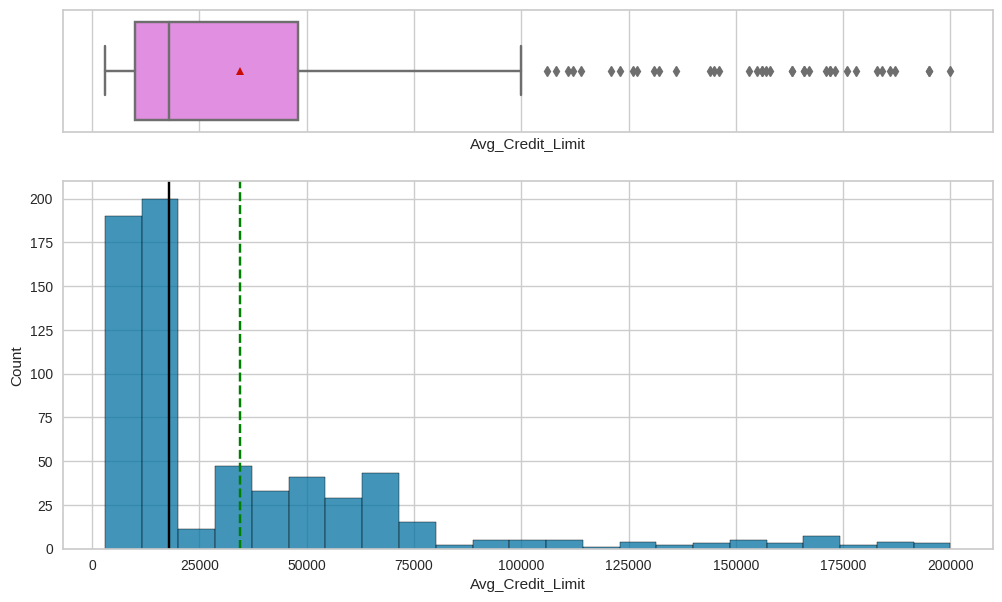

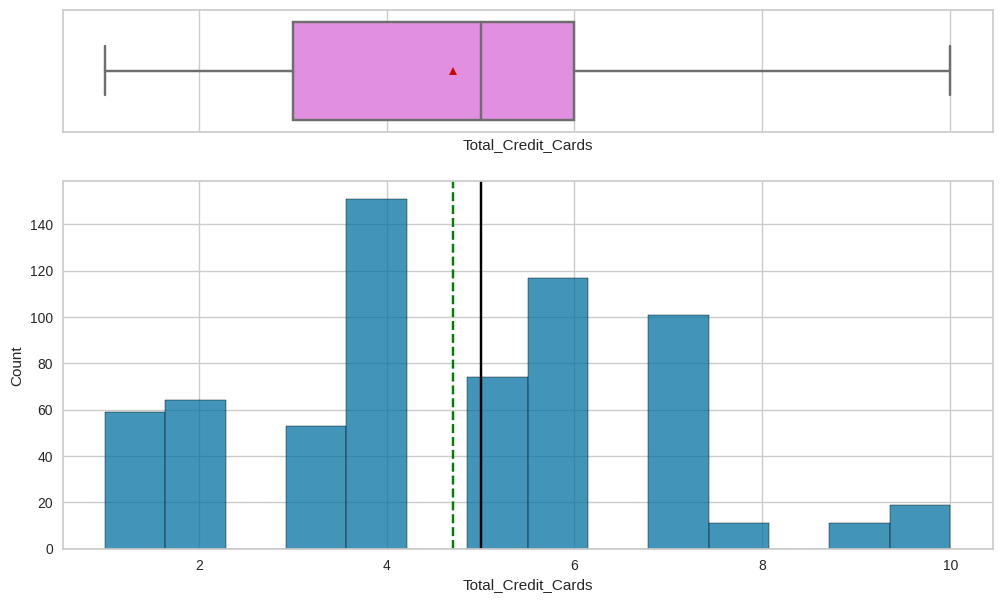

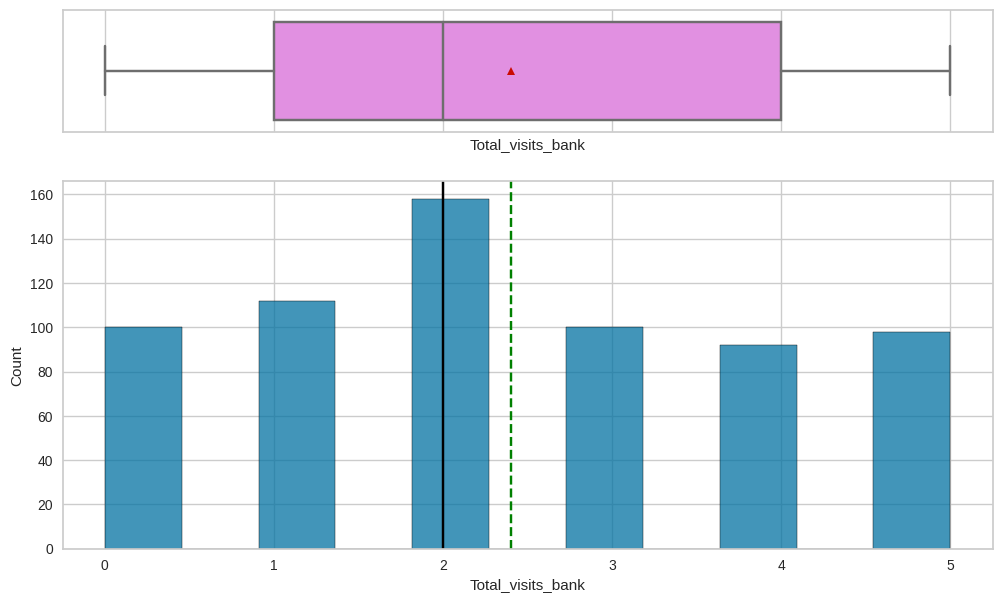

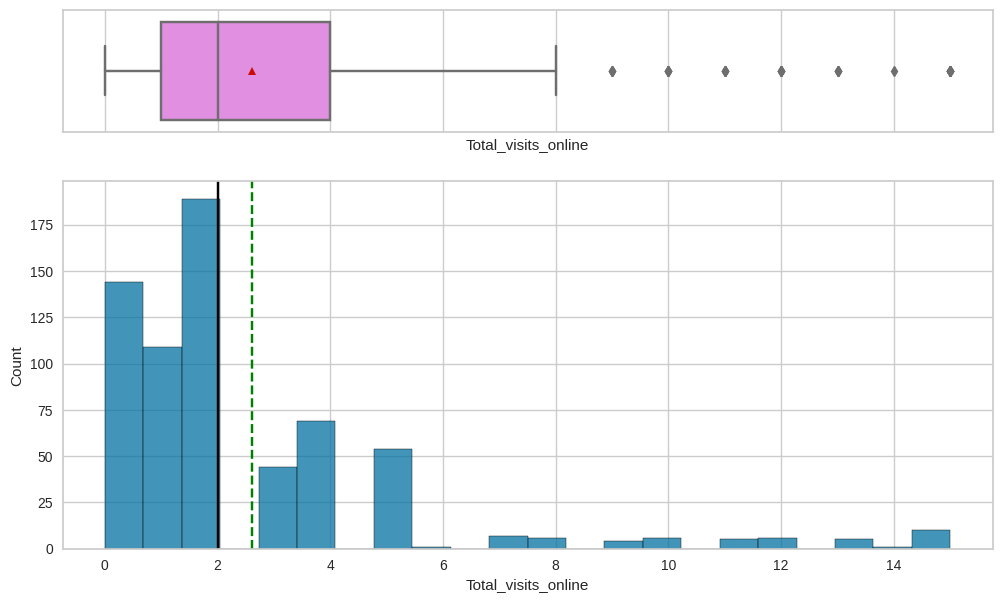

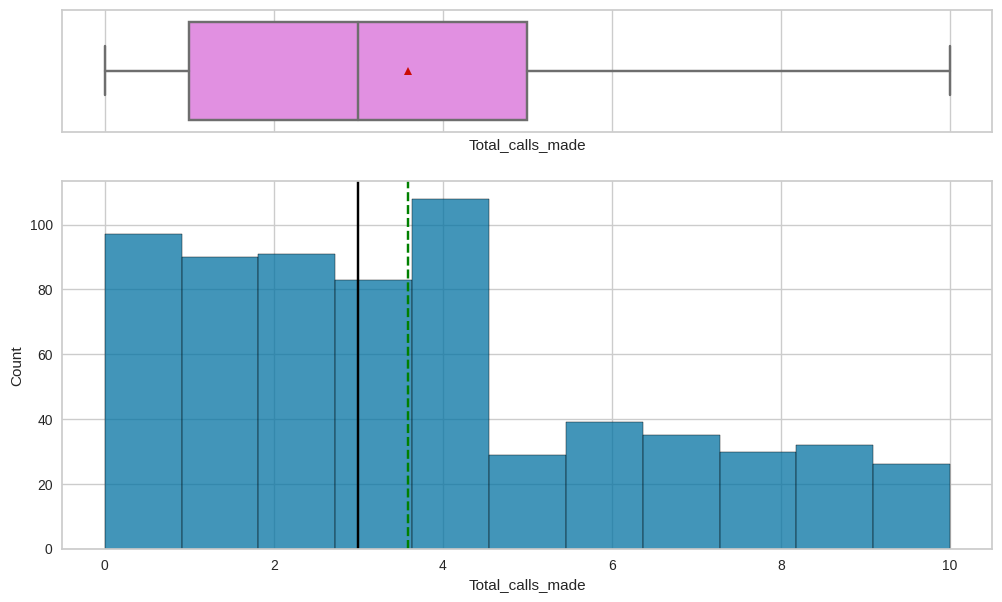

In [ ]:
for col in df.columns:
    histogram_boxplot(data, col)

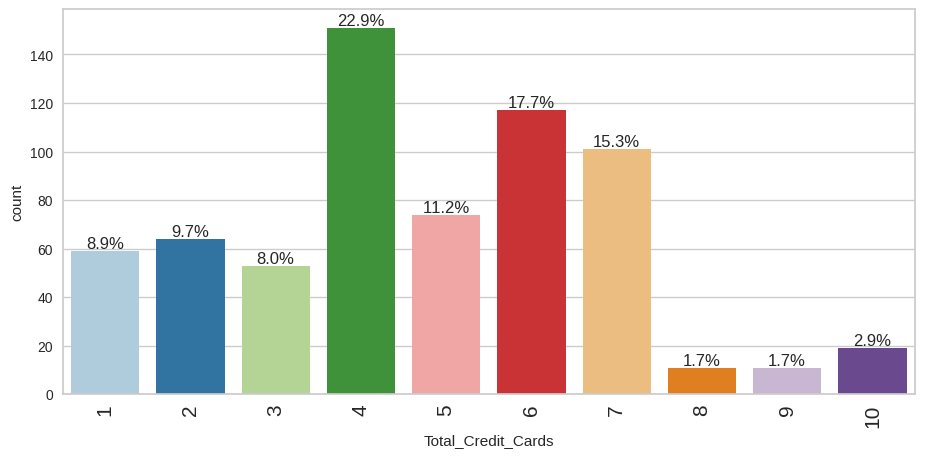

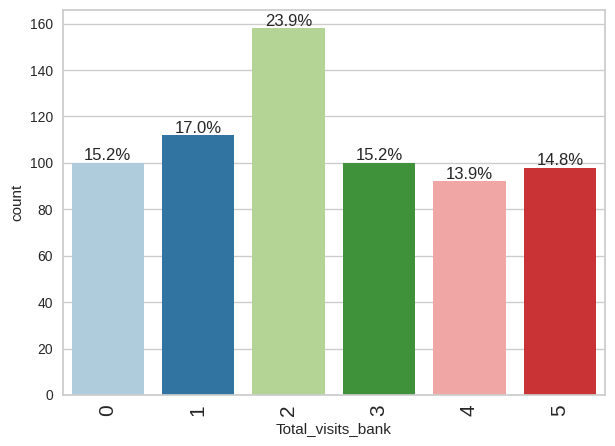

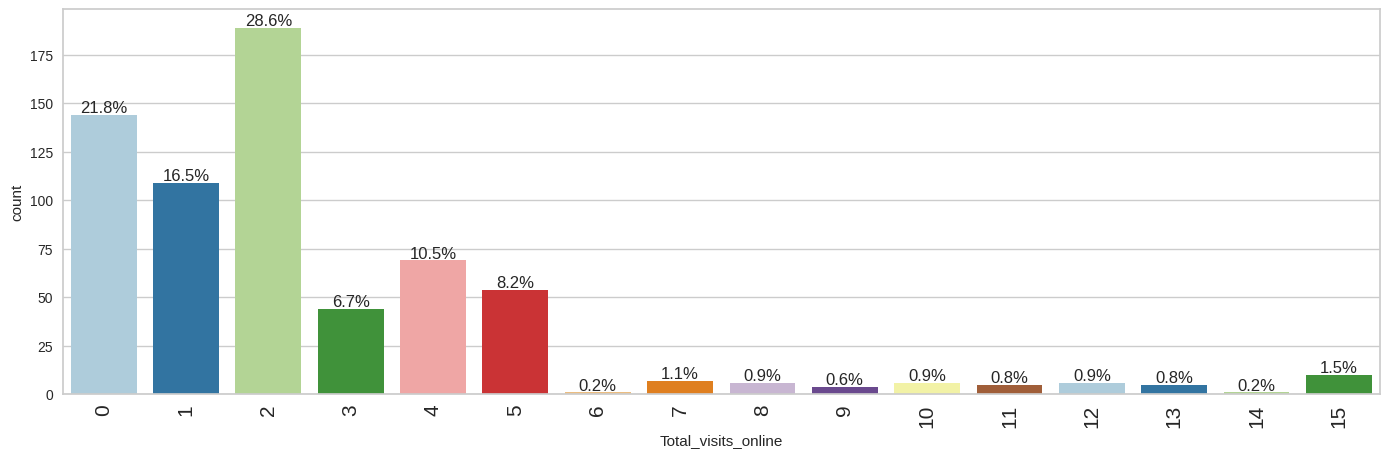

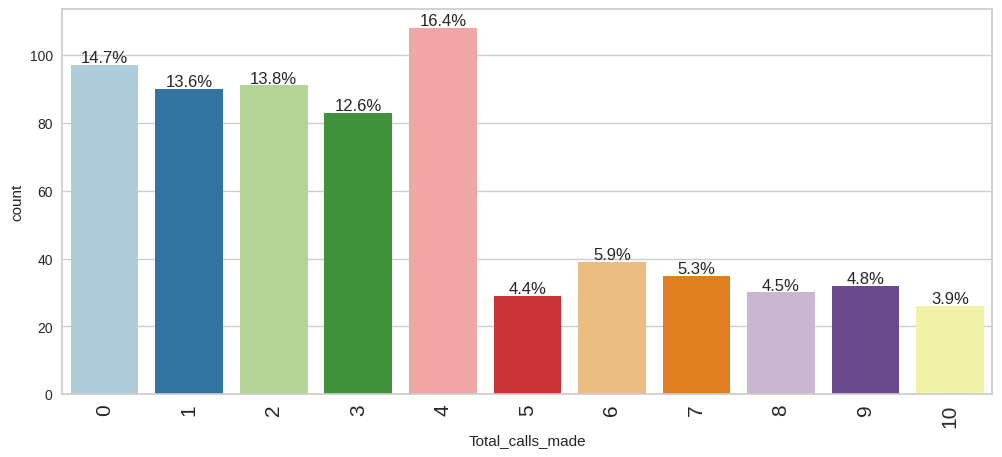

In [ ]:
for col in df.columns.tolist()[1:]:
    labeled_barplot(df, col, perc=True)

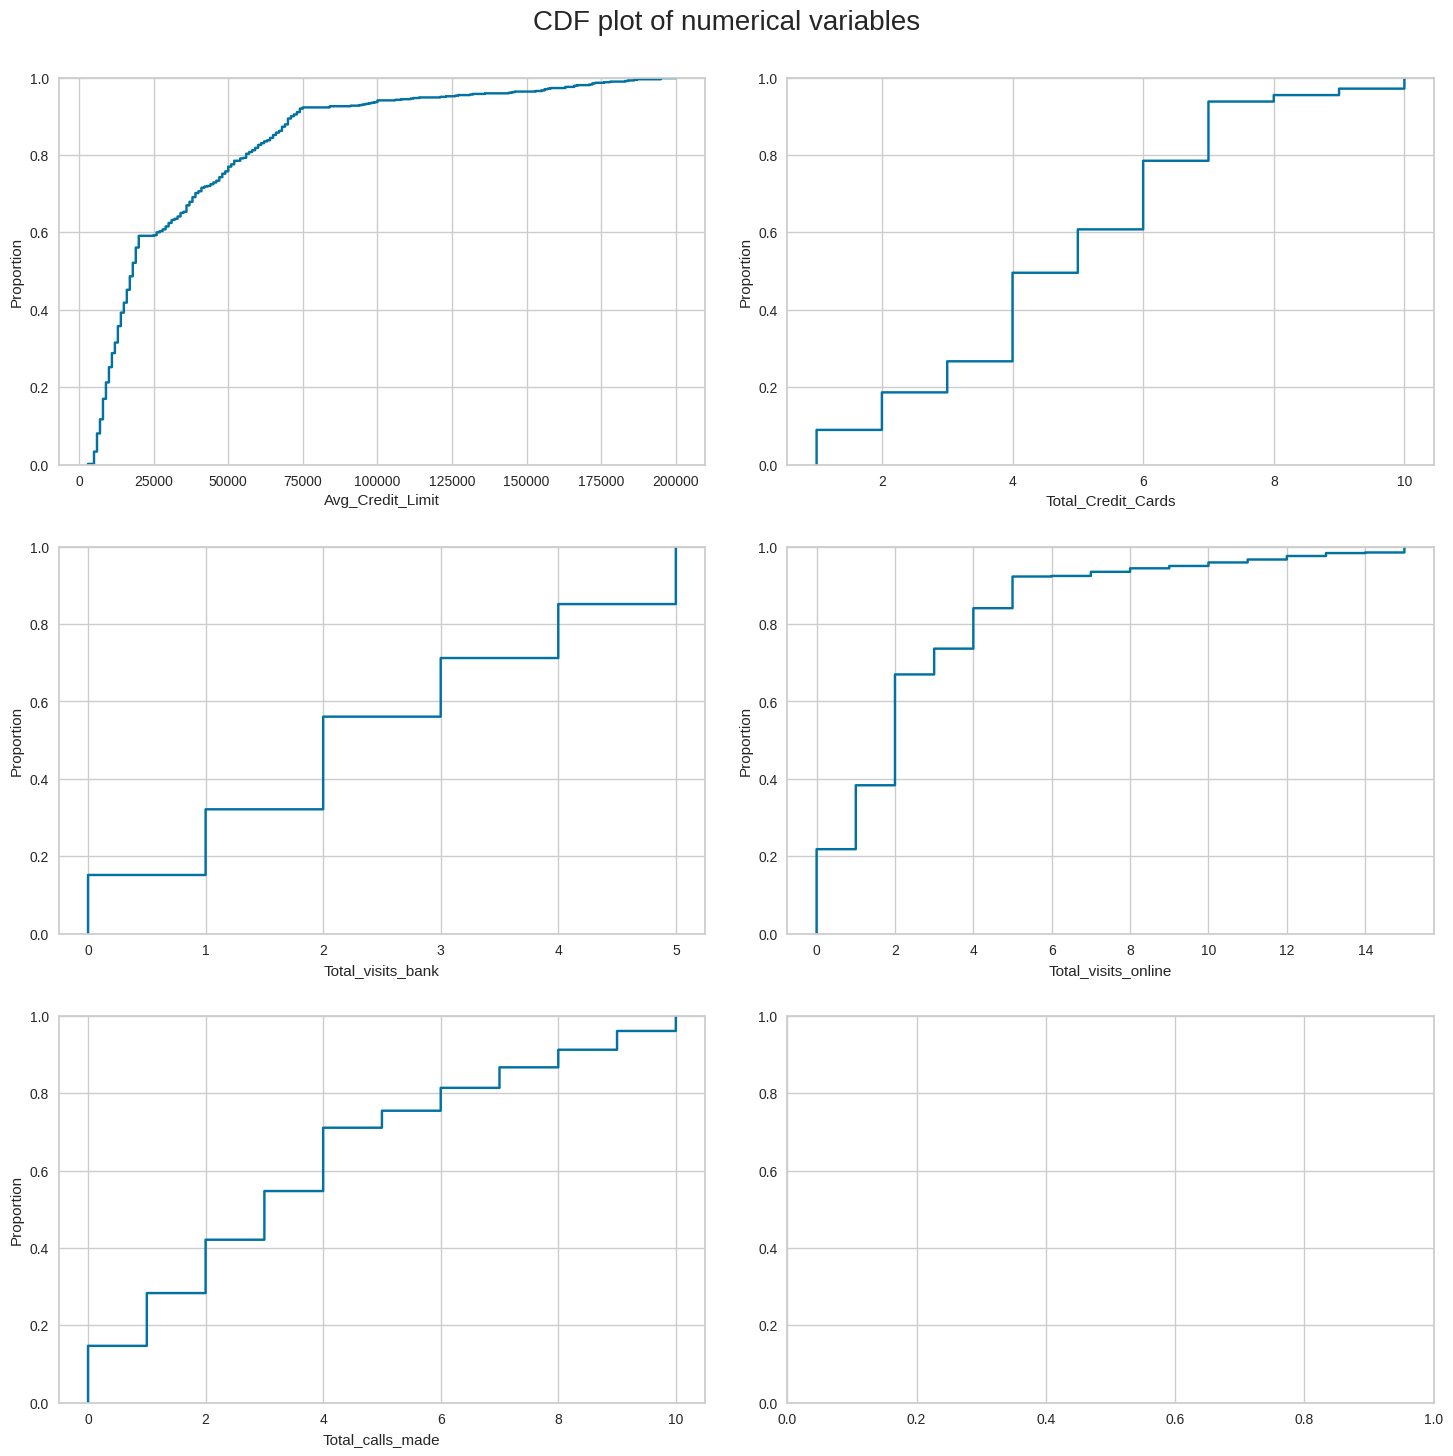

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

#**BIVARIATE ANALYSIS**

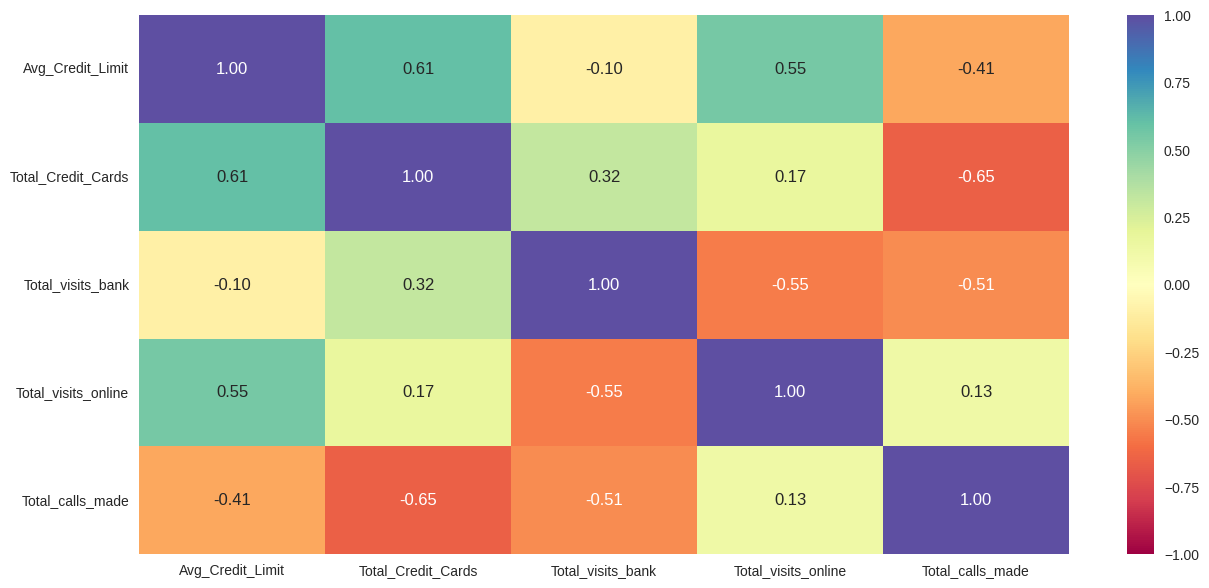

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

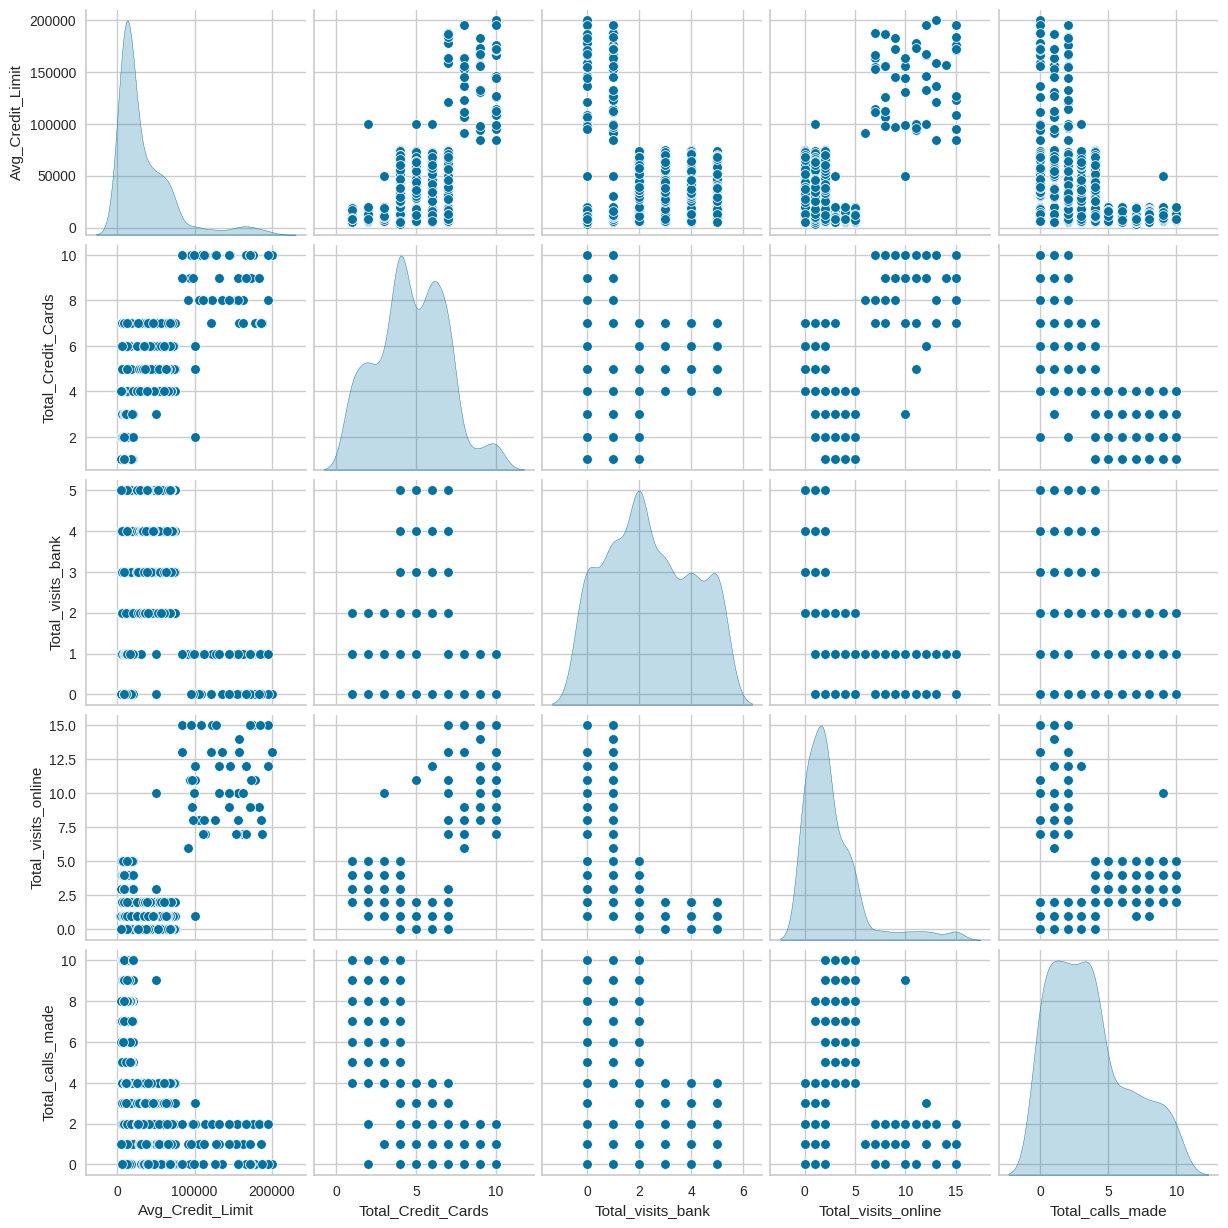

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

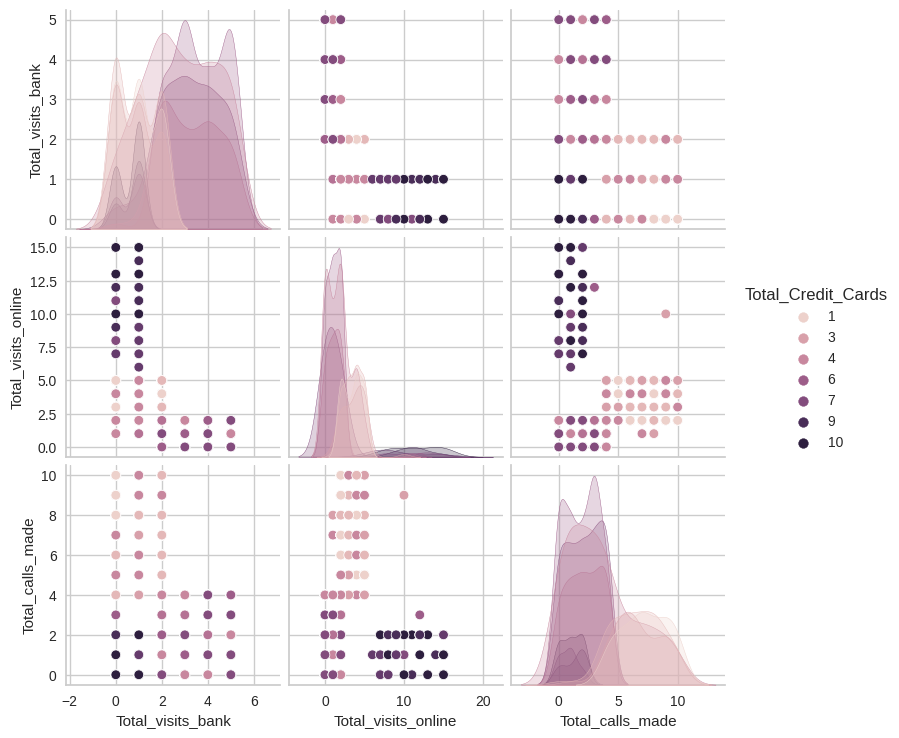

In [ ]:
sns.pairplot(
    data=df[
        [
            "Total_visits_bank",
            "Total_visits_online",
            "Total_calls_made",
            "Total_Credit_Cards",
        ]],hue="Total_Credit_Cards")

plt.show()

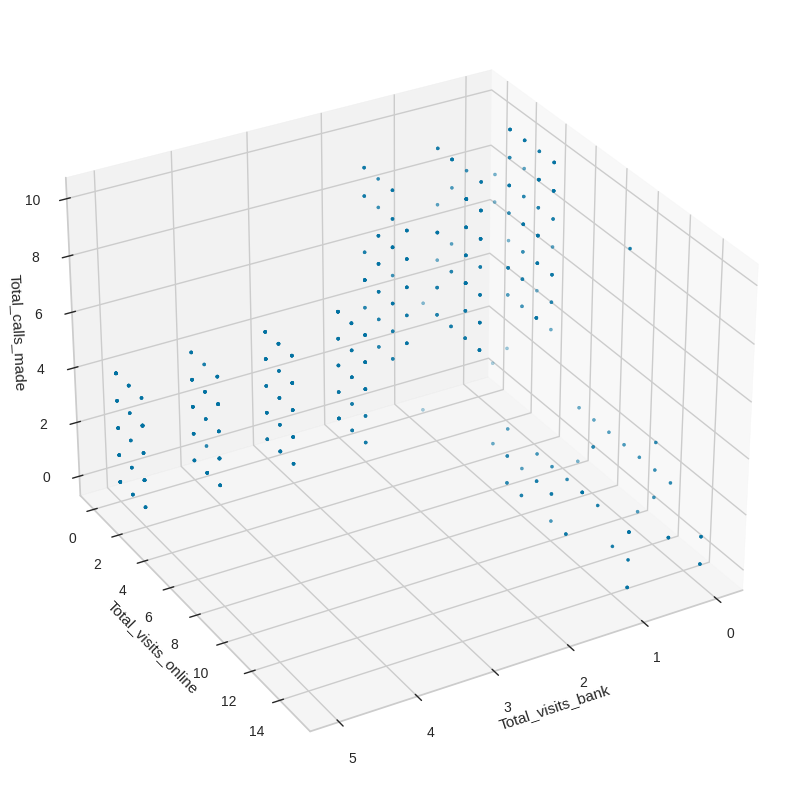

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

#**DATA PREPROCESSING**

OUTLIER DETECTION

In [ ]:
threshold = 3.0 # wite the value of the threshold
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []


#**SCALING**

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df.copy()  ## Complete the code to scale the data
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
subset_scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


#**K-MEANS CLUSTERING**

**checking elbow plot**

In [ ]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 2040.9898164784947
Number of Clusters: 3 	Average Distortion: 933.0437490000531
Number of Clusters: 4 	Average Distortion: 780.7736895551769
Number of Clusters: 5 	Average Distortion: 704.4759188657513
Number of Clusters: 6 	Average Distortion: 642.4285451423211
Number of Clusters: 7 	Average Distortion: 600.2238778375963
Number of Clusters: 8 	Average Distortion: 574.4418958177623
Number of Clusters: 9 	Average Distortion: 538.8269188945014
Number of Clusters: 10 	Average Distortion: 509.16313788912544


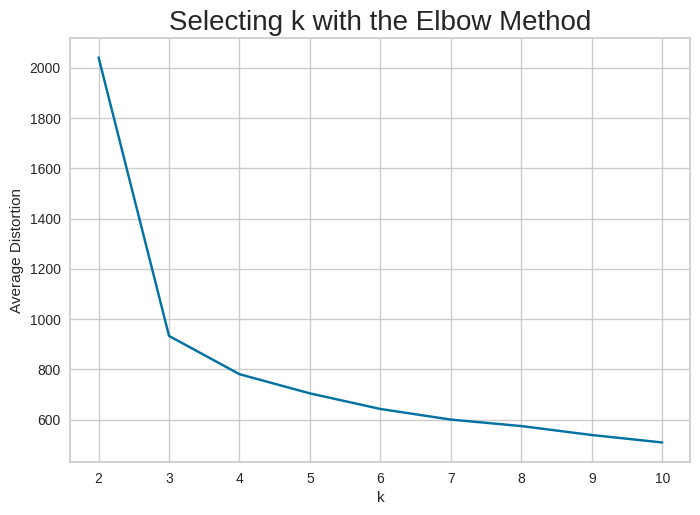

In [ ]:
clusters = range(2, 11)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = sum(
        np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1) ** 2)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

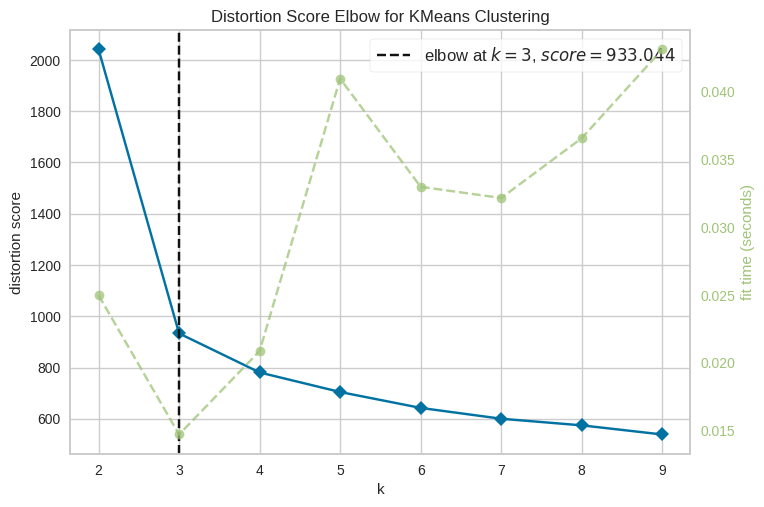

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

**checking silhouette scores**

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2717470361089752)
For n_clusters = 6, the silhouette score is 0.255906765297388)
For n_clusters = 7, the silhouette score is 0.24798644656011146)
For n_clusters = 8, the silhouette score is 0.2414240144760896)
For n_clusters = 9, the silhouette score is 0.2184645050755029)


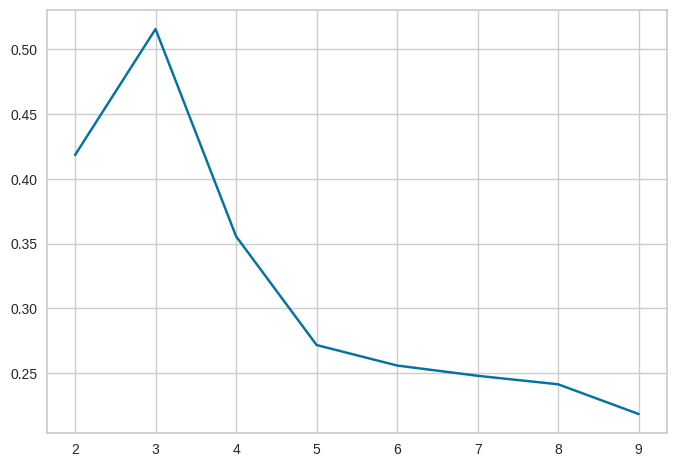

In [ ]:
plt.plot(cluster_list, sil_score)
plt.show()

#**VISUALIZATION OF SILHOUETTE SCORES FOR DIFFERENT NUMBER OF CLUSTERS**

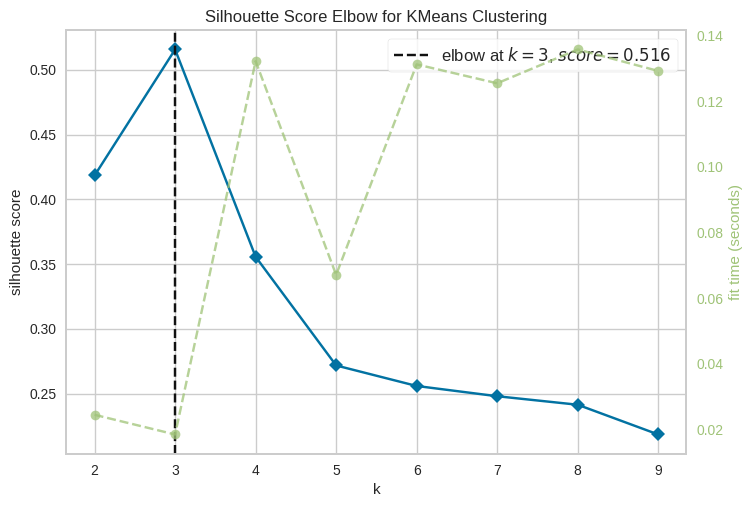

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric="silhouette", timings=True) ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

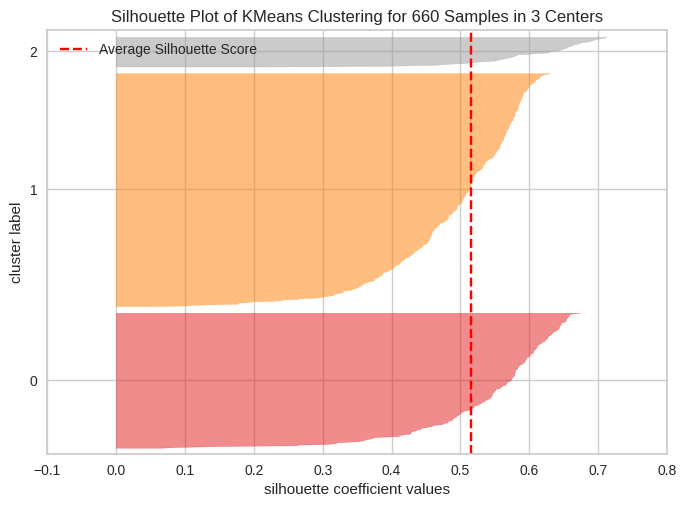

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

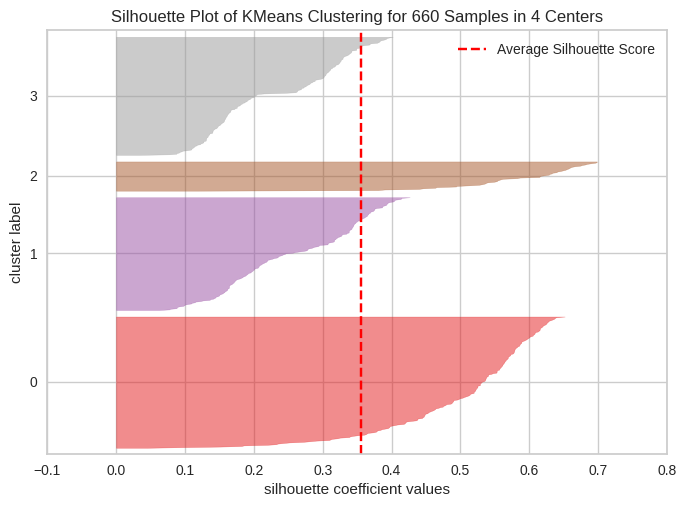

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

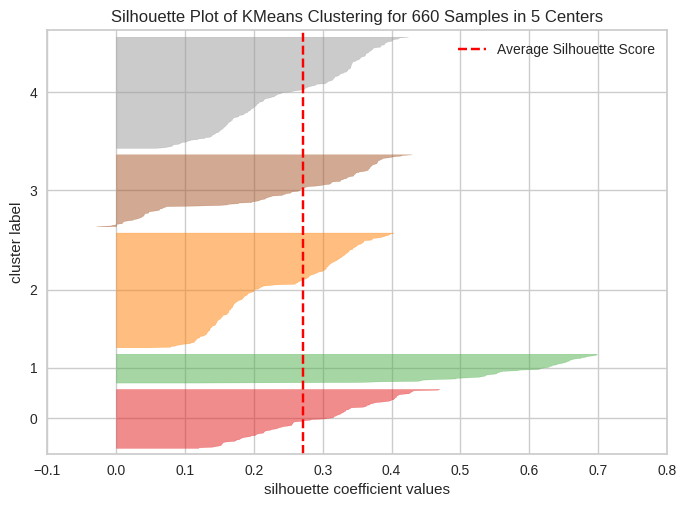

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

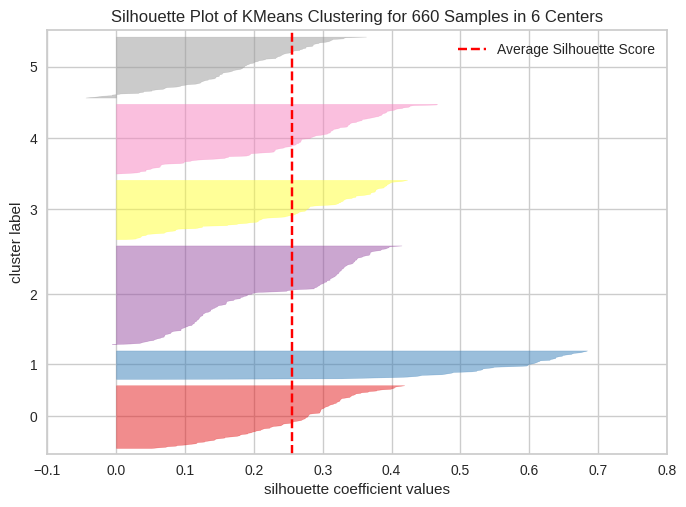

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

#**CREATE FINAL MODEL**

In [ ]:
%%time
kmeans = KMeans(n_clusters=3, random_state=1)  ## Complete the code to choose the number of clusters
kmeans.fit(k_means_df)

CPU times: user 38.5 ms, sys: 0 ns, total: 38.5 ms
Wall time: 38.9 ms


KMeans(n_clusters=3, random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

#**HIERARCHICAL CLUSTERING**

**COMPUTING COPHENETIC CORRELATION**

In [ ]:
hc_df = subset_scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"] ## Complete the code to add distance metrics

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print("Cophenetic correlation for {} distance and {} linkage is {}.".format(dm.capitalize(), lm, c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]))

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**EXPLORING DIFFERENT LINKAGE METHODS W/ EUCLIDEAN DISTANCE ONLY**

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print("Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(high_cophenet_corr, high_dm_lm[1]))

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


#**CHECKING DENDROGRAMS**


**COPHENETIC CORR IS HIGHEST W/ EUCLIDEAN AND AVERAGE LINKAGE..........GOING TO VIEW DENDROGRAMS FOR DIFFER LINKAGE METHODS**

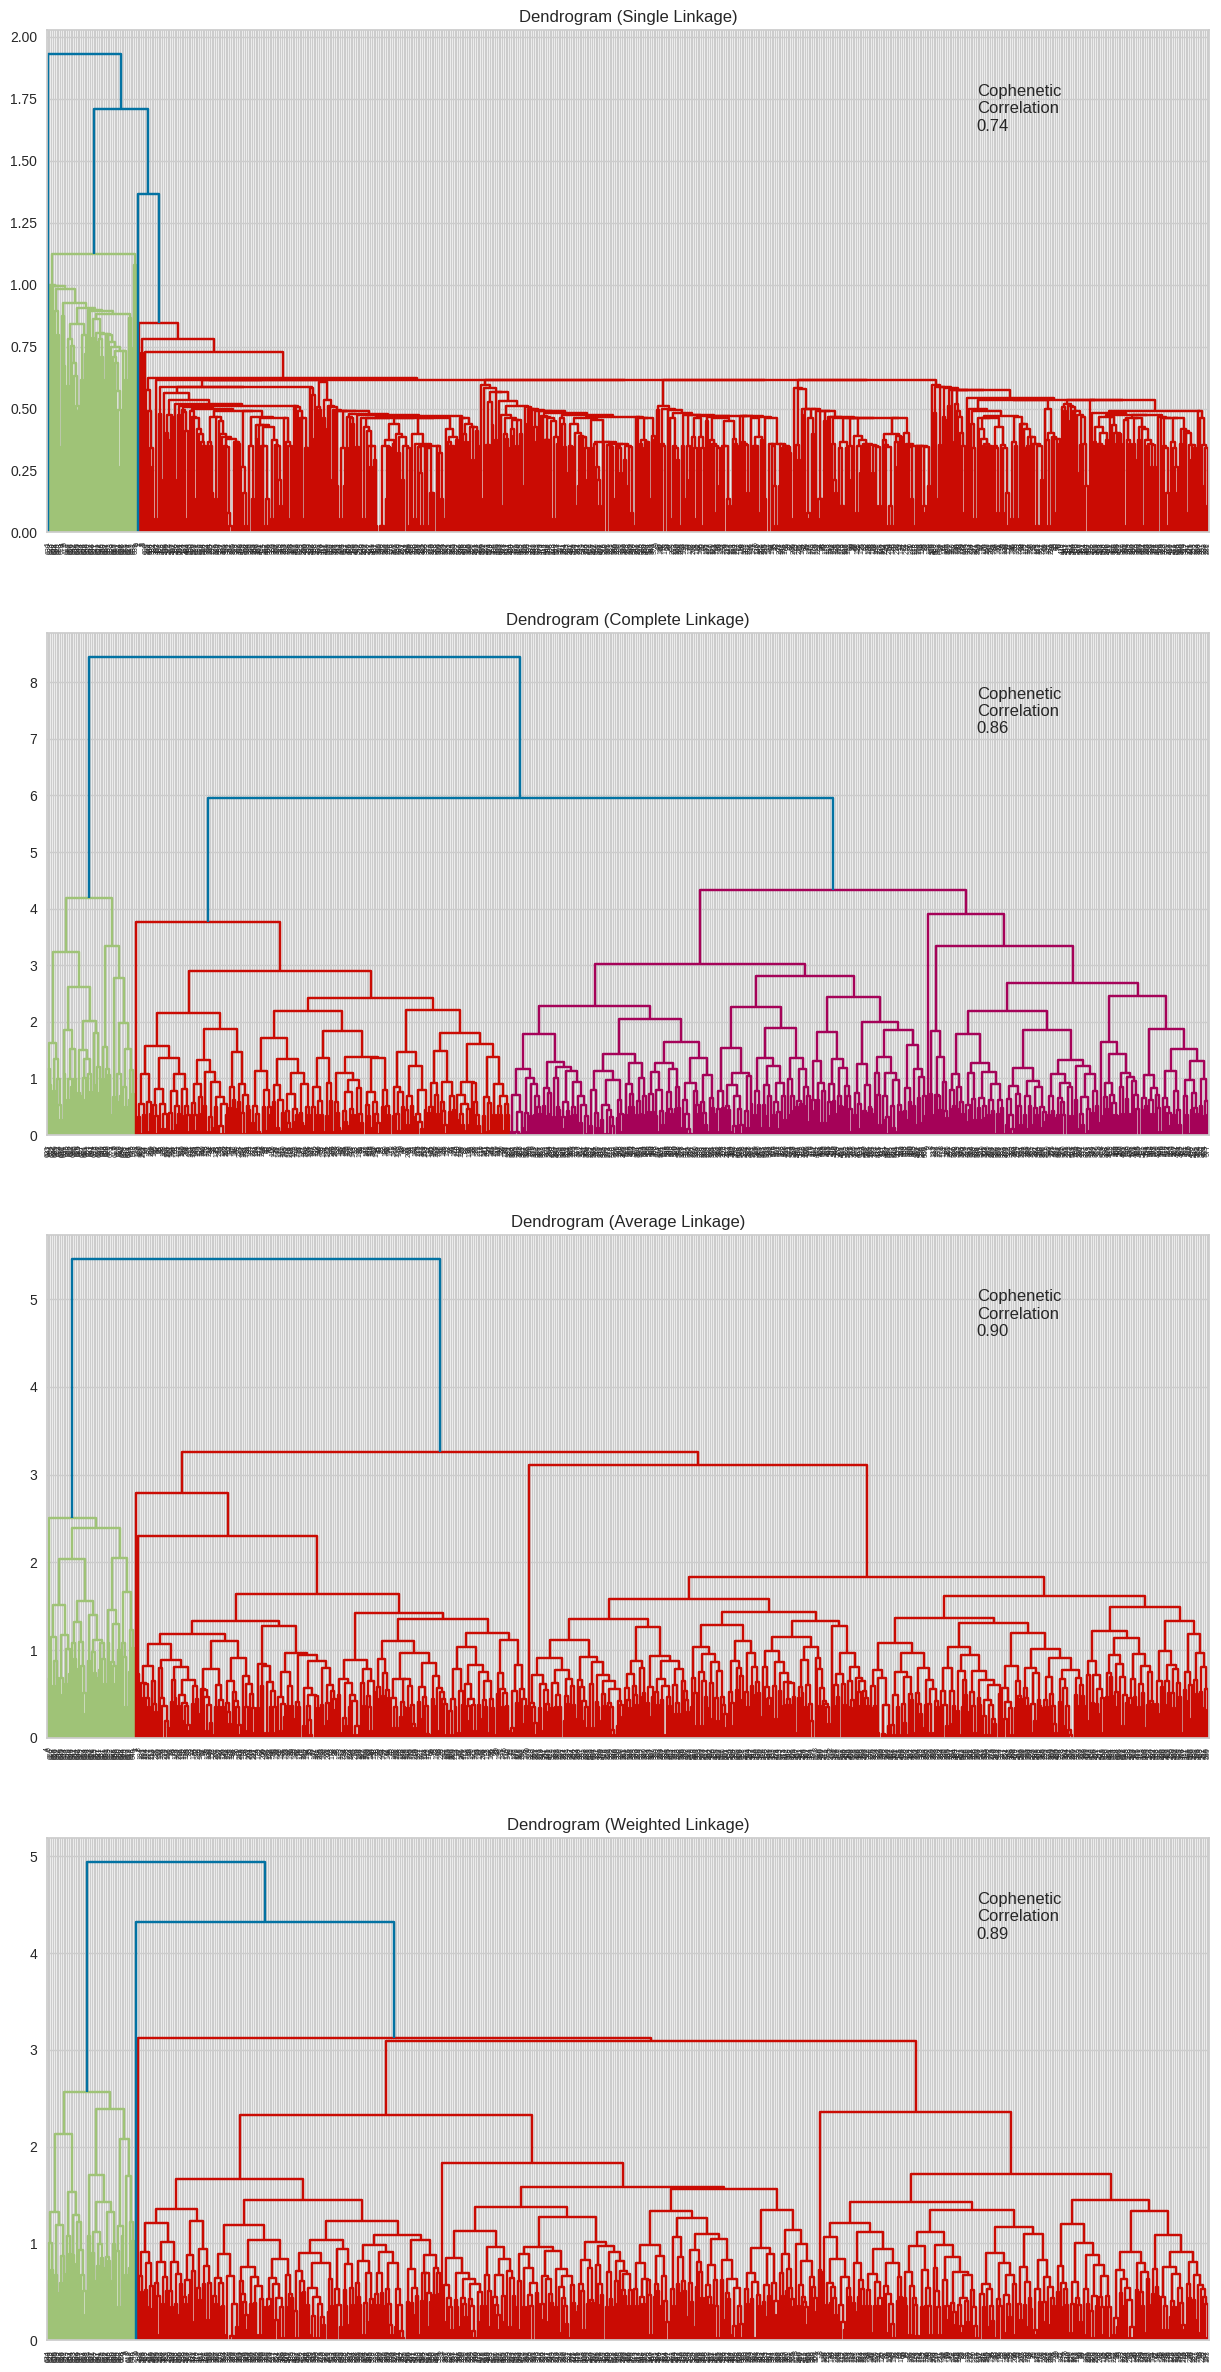

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"] ## Complete the code to add linkages

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",(0.80, 0.80),xycoords="axes fraction")

    compare.append([method, coph_corr])

**DENDROGRAM W/ AVERAGE LINKAGE SHOWS DISTINCT AND SEPARATE CLUSTER TREE**

In [ ]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
1,complete,0.859973
3,weighted,0.886175
2,average,0.897708


#**CREATING FINAL MODEL**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  ## Complete the code to define the hierarchical clustering model
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
hc_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1


In [ ]:
df2.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1


In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df1["HC_Clusters"] = HCmodel.labels_

#**CLUSTER PROFILING AND COMPARISON**

**CLUSTER PROFILING: K-MEANS CLUSTERING**

In [ ]:
km_cluster_profile= df1.groupby("K_means_segments").mean()  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile["count_in_each_segment"] = (df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values)  ## Complete the code to groupby the cluster labels

In [ ]:
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,1.901786,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,0.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50


**CLUSTER PROFILING: HIERARCHICAL CLUSTERING**

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (df2.groupby("HC_segments")["Avg_Credit_Limit"].count().values)

In [ ]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


#**K-MEANS VS HIERARCHICAL CLUSTERING**

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,1.901786,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,0.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50


In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33151.133501,5.460957,3.405542,1.010076,2.060453,397
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12234.741784,2.352113,0.957746,3.633803,7.009390,213


<Axes: xlabel='K_means_segments'>

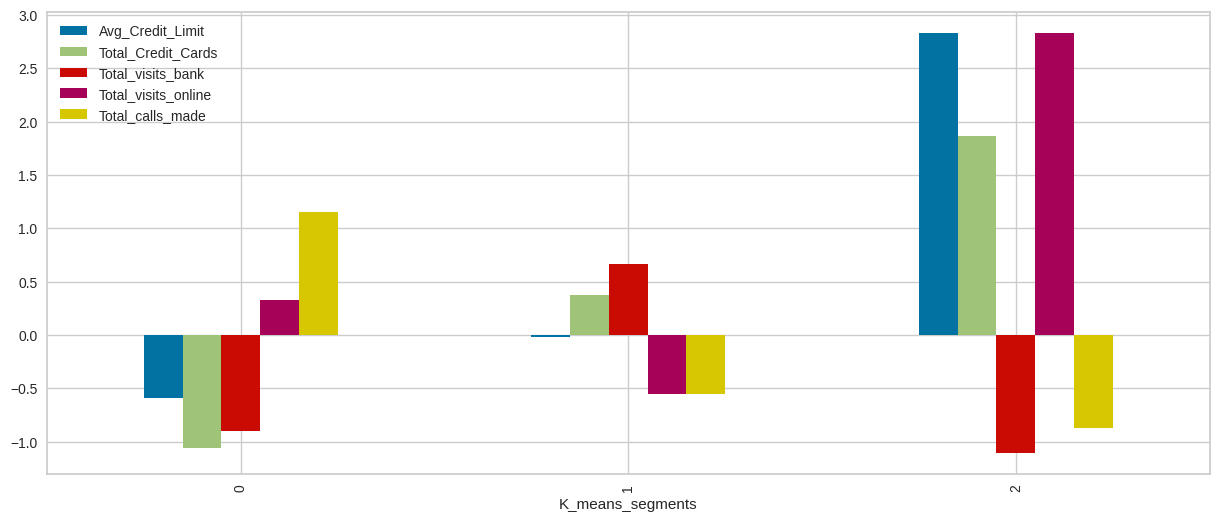

In [ ]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

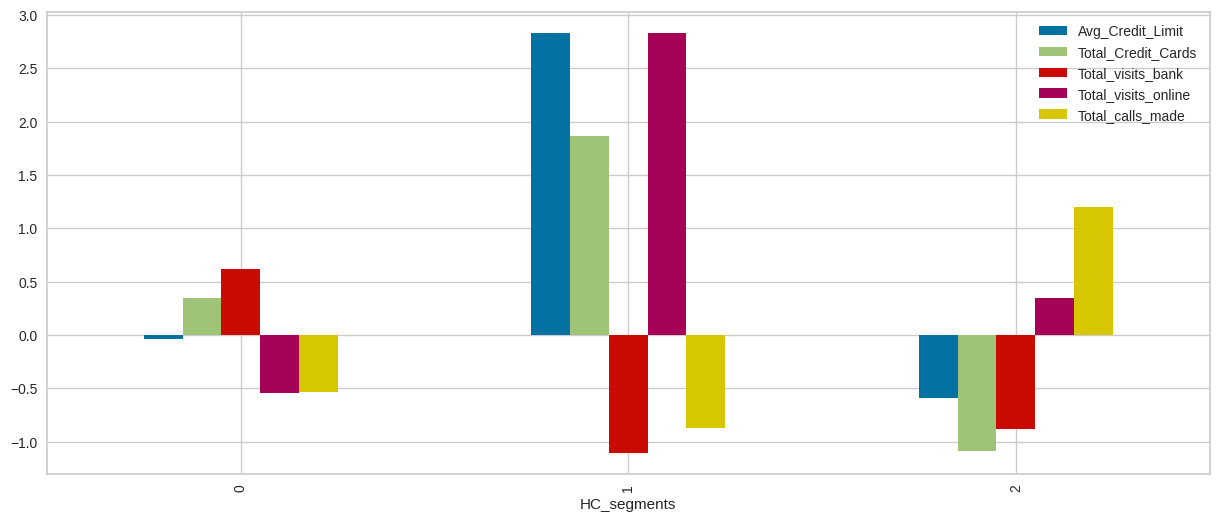

In [ ]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

In [ ]:
k_means_df.loc[k_means_df["K_means_segments"] == 1, "K_means_segments"] = 3
k_means_df.loc[k_means_df["K_means_segments"] == 2, "K_means_segments"] = 1
k_means_df.loc[k_means_df["K_means_segments"] == 3, "K_means_segments"] = 2
df1["K_means_segments"] = k_means_df["K_means_segments"]

km_cluster_profile = df1.groupby("K_means_segments").mean()
km_cluster_profile["count_in_each_segment"] = (df1.groupby("K_means_segments")["Avg_Credit_Limit"].count().values)

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,1.901786,224
1,141040.000000,8.740000,0.600000,10.900000,1.080000,1.000000,50
2,33782.383420,5.515544,3.489637,0.981865,2.000000,0.000000,386


<Axes: xlabel='K_means_segments'>

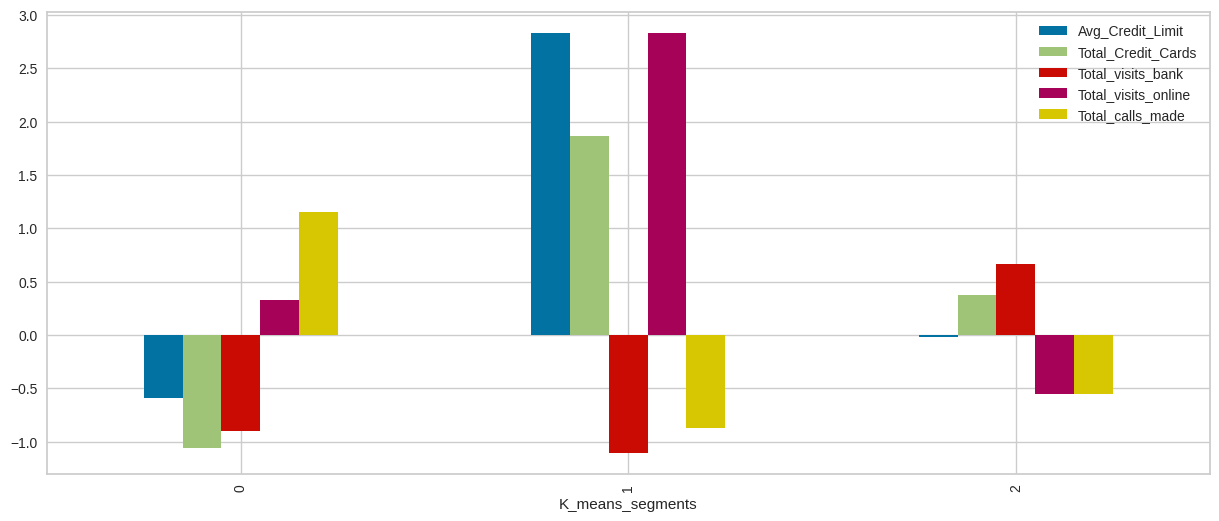

In [ ]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

#**PLOTTING ON ORIGINAL DATA TO UNDERSTAND CUSTOMER DISTRIBTUION AMONG CLUSTERS**

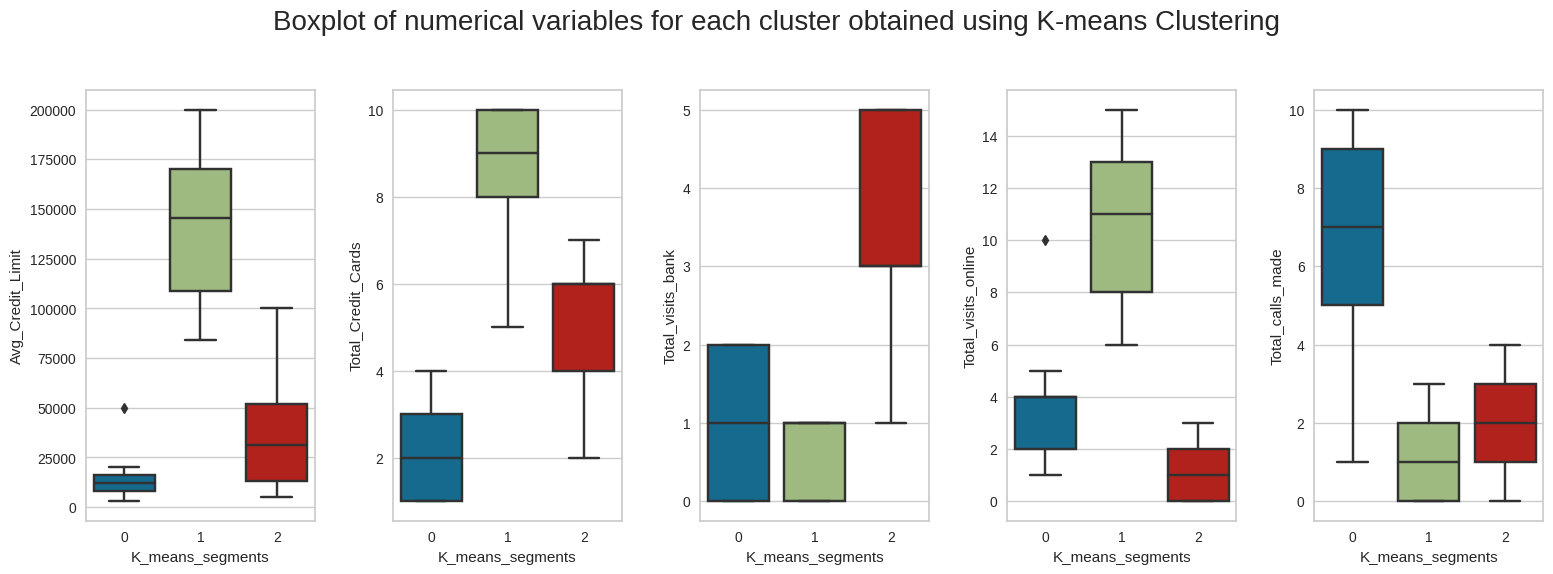

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster obtained using K-means Clustering",fontsize=20)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

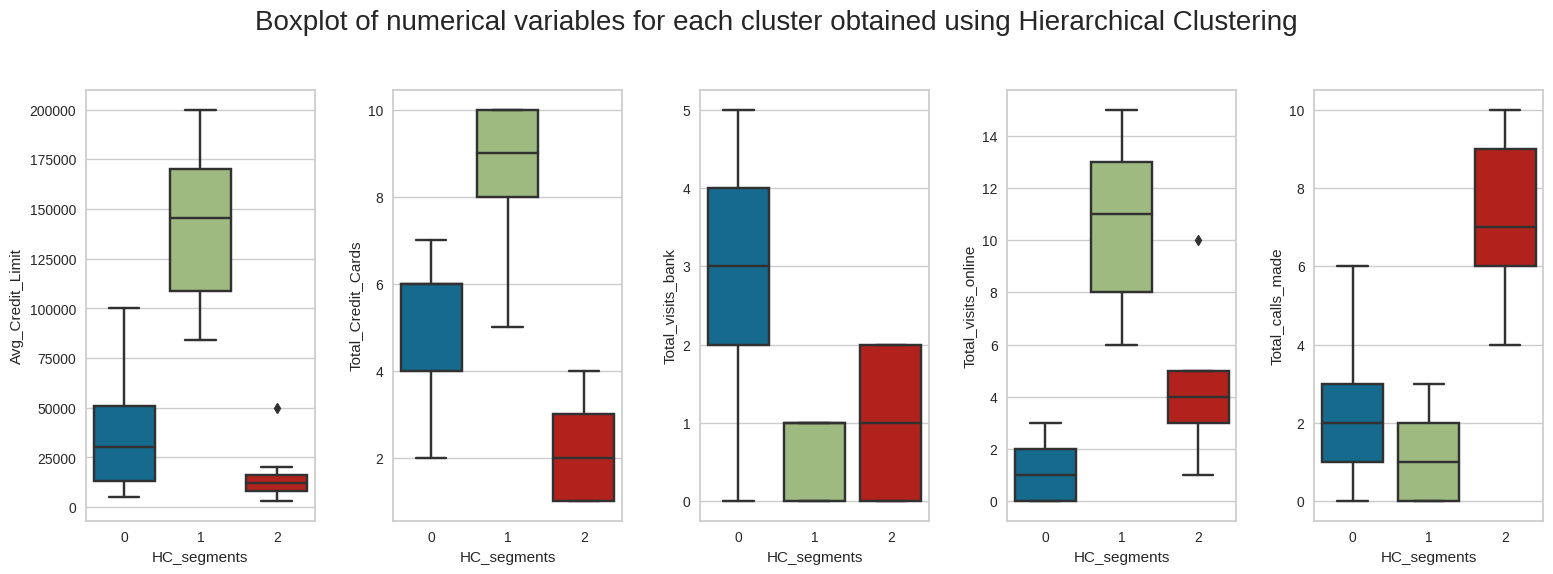

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",fontsize=20)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)